# NLP - Text Generation for Irish Lyrics

This example is from the DeepLearning AI TensorFlow Develope Profession Certificate course on Coursera.

Let's make some lyrics.

In [2]:
# Import packages
import numpy as np
import tensorflow as tf

print(f'The numpy version is {np.__version__}.')
print(f'The TensorFlow version {tf.__version__}.')

The numpy version is 1.23.5.
The TensorFlow version 2.12.0.


# Data - Lyrics

Use the lyrics from Lanigan's ball, probably diverge from here.

In [2]:
# Song Lyrics
lyrics = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the string by line and put it in a list
corpus = lyrics.lower().split("\n")

# View the result
print(corpus[0])

in the town of athy one jeremy lanigan 


# Process the Data

Make the label the next word in the song.

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Init the tokenizer and make a word index
tokenizer = Tokenizer()

# Make the word index
tokenizer.fit_on_texts(corpus)

# Define the total words
total_words = len(tokenizer.word_index) + 1 # Word index and OOV token

# print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

total words: 263


In [4]:
"""
Loop over every line in the corpus. Each time turning the text into a sequence
and then making sub-phrases of each line. The shortest sequence will be two
words because one word is the data and the second word is the label.

Then, using the length of the longest line, pad all the sequences to be the
same length for the model.
"""

# Make the input matrix
input_sequences = []

# Here goes the big loop
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Second loop to generate the sequence sub-phrases
    for i in range(1, len(token_list)):
        # Generate the sub-phrase
        n_gram_sequence = token_list[:i+1]

        # Add the sub-phrase to the sequence list
        input_sequences.append(n_gram_sequence)

# Check the data
print(input_sequences[:10])

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70], [71, 40], [71, 40, 20], [71, 40, 20, 21]]


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Get the longest line and pad the data for data-label split
max_sequence_len = max(len(x) for x in input_sequences)

input_sequences = np.array(pad_sequences(
    input_sequences,
    maxlen=max_sequence_len,
    padding='pre'))

print(input_sequences[:10])

[[ 0  0  0  0  0  0  0  0  0  4  2]
 [ 0  0  0  0  0  0  0  0  4  2 66]
 [ 0  0  0  0  0  0  0  4  2 66  8]
 [ 0  0  0  0  0  0  4  2 66  8 67]
 [ 0  0  0  0  0  4  2 66  8 67 68]
 [ 0  0  0  0  4  2 66  8 67 68 69]
 [ 0  0  0  4  2 66  8 67 68 69 70]
 [ 0  0  0  0  0  0  0  0  0 71 40]
 [ 0  0  0  0  0  0  0  0 71 40 20]
 [ 0  0  0  0  0  0  0 71 40 20 21]]


In [6]:
# Create features and labels from the input_sequence array
x, labels = input_sequences[:,:-1], input_sequences[:,-1]

# Convert labels to one-hot array
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Check the data
print(f'An example feature is {x[5]}')
print(f'An example label is {labels[5]}')
print(f'The one-hot category shape looks like {y.shape}')

An example feature is [ 0  0  0  0  4  2 66  8 67 68]
An example label is 69
The one-hot category shape looks like (453, 263)


# Build and Train the Model

The last dense layer will be [total words] long and use a softmax activation function.
The loss function will be categorical cross-entropy.

In [7]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            16832     
                                                                 
 bidirectional (Bidirectiona  (None, 40)               13600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
history = model.fit(x, y, epochs=250)

Epoch 1/250
15/15 [==============================] - 0s 20ms/step - loss: 5.0171 - accuracy: 0.0419
Epoch 2/250
15/15 [==============================] - 0s 34ms/step - loss: 4.9832 - accuracy: 0.0574
Epoch 3/250
15/15 [==============================] - 1s 60ms/step - loss: 4.9449 - accuracy: 0.0464
Epoch 4/250
15/15 [==============================] - 1s 36ms/step - loss: 4.9007 - accuracy: 0.0574
Epoch 5/250
15/15 [==============================] - 1s 60ms/step - loss: 4.8574 - accuracy: 0.0508
Epoch 6/250
15/15 [==============================] - 0s 21ms/step - loss: 4.8045 - accuracy: 0.0508
Epoch 7/250
15/15 [==============================] - 0s 8ms/step - loss: 4.7513 - accuracy: 0.0552
Epoch 8/250
15/15 [==============================] - 0s 20ms/step - loss: 4.6947 - accuracy: 0.0574
Epoch 9/250
15/15 [==============================] - 0s 19ms/step - loss: 4.6487 - accuracy: 0.0596
Epoch 10/250
15/15 [==============================] - 0s 20ms/step - loss: 4.6017 - accuracy: 0.0618


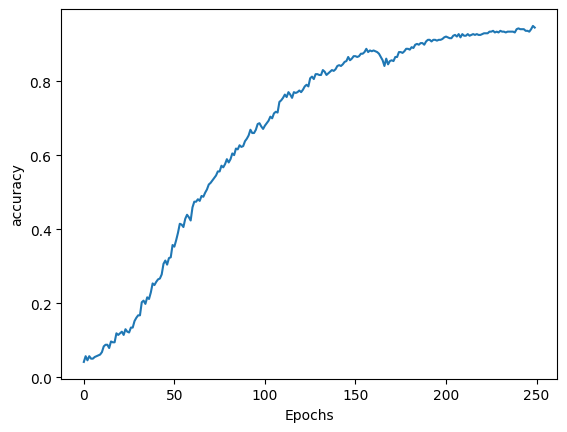

In [11]:
# Visualize the accuracy
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

# Predict some text

Note that repeated words can be an issue. Maybe figure out a way to get around it.

In [12]:
"""
The hardest problem is repeating words. My solution - though likely not most
efficient - is to track the last two words used to make sure they are not
repeated. I save the index of the top two words, and use the second most likely
word if the most likely word is the same as the last two words.
"""

# Define seed text and total words to predict
seed_text = "Nick went to Dublin and"
next_words = 15

past_pred_1 = 0 # Index value of last word used.
past_pred_2 = 0 # Index value of next last word used.

# Loop to generate words
for i in range(next_words):
    # Convert seed text to token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the token sequence
    token_list = pad_sequences(
        [token_list],
        maxlen=max_sequence_len-1,
        padding='pre')

    # Predict the probability for each index
    probs = model.predict(token_list)

    # Get the index with the highest and second-highest probability
    predicted_1 = np.argmax(probs)
    predicted_2 = (-probs).argsort()[0][1]

    # Pick a word based on highest probability and last word used
    if predicted_1 != past_pred_1 and predicted_1 != past_pred_2:
        output_word = tokenizer.index_word[predicted_1]
        seed_text += " " + output_word
        past_pred_2 = past_pred_1
        past_pred_1 = predicted_1
    else:
        output_word = tokenizer.index_word[predicted_2]
        seed_text += " " + output_word
        past_pred_2 = past_pred_1
        past_pred_1 = predicted_1

1/1 [==============================] - 0s 28ms/step


In [13]:
# Print the result
print(seed_text)

Nick went to Dublin and he whirligig rose reel a able glisten then mavrone boys twas runctions glisten then there
